# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# DATA COLLECTION

In [2]:
traffic_data = pd.read_csv('traffic.csv')

In [3]:
traffic_data.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [4]:
print(traffic_data.columns)

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [5]:
traffic_data.shape

(48120, 4)

# DATA PREPRCESSSING AND FEATURE ENGINEERING

In [6]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['hours'] =traffic_data['DateTime'].dt.hour
traffic_data['week'] = traffic_data['DateTime'].dt.dayofweek
traffic_data['is_weekend'] = traffic_data['week'].isin([5,6]).astype(int)

In [7]:
traffic_data.shape

(48120, 7)

In [8]:
print(traffic_data)

                 DateTime  Junction  Vehicles           ID  hours  week  \
0     2015-11-01 00:00:00         1        15  20151101001      0     6   
1     2015-11-01 01:00:00         1        13  20151101011      1     6   
2     2015-11-01 02:00:00         1        10  20151101021      2     6   
3     2015-11-01 03:00:00         1         7  20151101031      3     6   
4     2015-11-01 04:00:00         1         9  20151101041      4     6   
...                   ...       ...       ...          ...    ...   ...   
48115 2017-06-30 19:00:00         4        11  20170630194     19     4   
48116 2017-06-30 20:00:00         4        30  20170630204     20     4   
48117 2017-06-30 21:00:00         4        16  20170630214     21     4   
48118 2017-06-30 22:00:00         4        22  20170630224     22     4   
48119 2017-06-30 23:00:00         4        12  20170630234     23     4   

       is_weekend  
0               1  
1               1  
2               1  
3               1  

# split the data into training and testing

In [9]:
traininig = ['Junction','hours','week','is_weekend']
X =traffic_data[traininig]
y =traffic_data['Vehicles']

In [10]:
X.shape

(48120, 4)

In [13]:
print(X)

       Junction  hours  week  is_weekend
0             1      0     6           1
1             1      1     6           1
2             1      2     6           1
3             1      3     6           1
4             1      4     6           1
...         ...    ...   ...         ...
48115         4     19     4           0
48116         4     20     4           0
48117         4     21     4           0
48118         4     22     4           0
48119         4     23     4           0

[48120 rows x 4 columns]


In [14]:
y.shape

(48120,)

In [15]:
print(y)

0        15
1        13
2        10
3         7
4         9
         ..
48115    11
48116    30
48117    16
48118    22
48119    12
Name: Vehicles, Length: 48120, dtype: int64


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state =2)

# MODEL

In [18]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

# PREDICTING TRAINING AND TESTING SET

In [19]:
train_predictions = model.predict(X_train)

In [20]:
test_predictions = model.predict(X_test)

# EVALUATING THE MODEL

In [21]:
eval1 = mean_absolute_error(y_train,train_predictions)
print(f"mean_absolute_error:{eval1}")

mean_absolute_error:11.414750922581318


In [22]:
eval2 = mean_absolute_error(y_test,test_predictions)
print(f"mean_absolute_error:{eval}")

mean_absolute_error:<built-in function eval>


# DATA VISUALIZATION

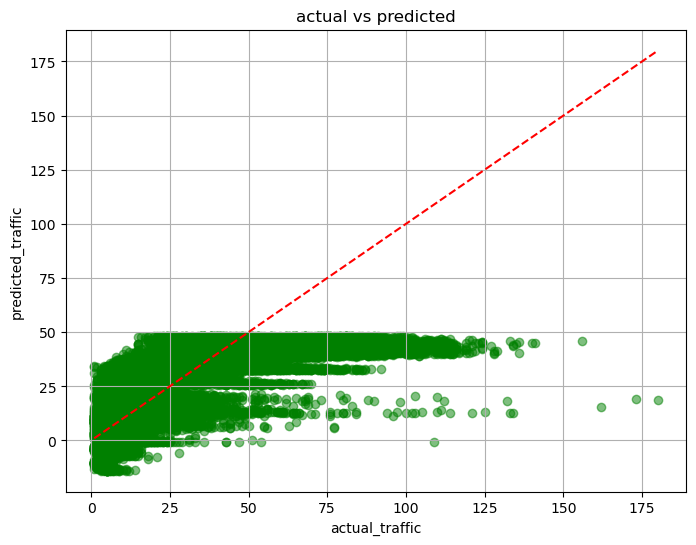

In [23]:
#PLOTING ACTUAL VS PREDICTING VALUES FOR TRAINING SET
plt.figure(figsize=(8,6))
plt.scatter(y_train,train_predictions,color ='green',alpha = 0.5)
plt.xlabel('actual_traffic')
plt.ylabel('predicted_traffic')
plt.title('actual vs predicted')
plt.plot([min(y_train),max(y_train)],[min(y_train),max(y_train)],linestyle ='--',color = 'red')
plt.grid(True)
plt.show()

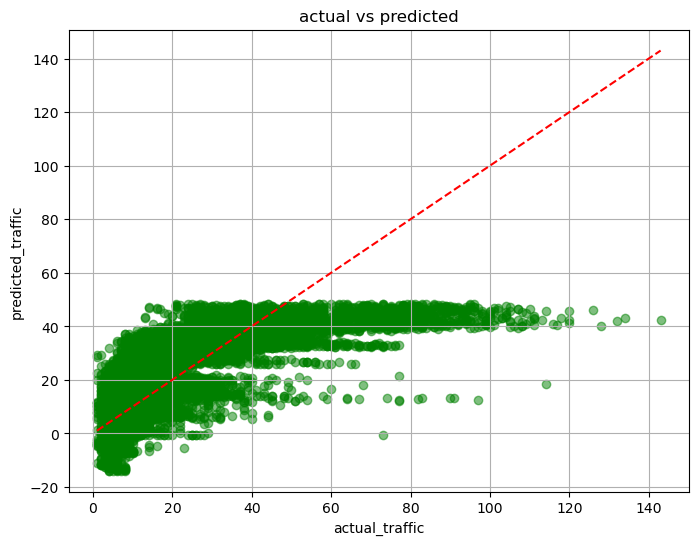

In [24]:
#PLOTING ACTUAL VS PREDICTING VALUES FOR TEST SET
plt.figure(figsize=(8,6))
plt.scatter(y_test,test_predictions,color ='green',alpha = 0.5)
plt.xlabel('actual_traffic')
plt.ylabel('predicted_traffic')
plt.title('actual vs predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],linestyle ='--',color = 'red')
plt.grid(True)
plt.show()

# EXAMPLE PREDICTION

In [74]:
new_features = [[10, 3, 0, 2]] 
predict_traffic = model.predict(new_features)
print(f"ptredict_traffic_volume:{predict_traffic}")

ptredict_traffic_volume:[-96.41976747]


C:\Users\aruno\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
 # in this linear regression is not fit in time series data in future that traffic_flow_prediction  implement in LSTM
    